In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import seaborn as sns

In [2]:
# 

In [57]:
dfNA = pd.read_csv('casesNA.csv',compression = 'gzip')
dfCA = pd.read_csv('casesCanada.csv',compression = 'gzip')
dfUS = pd.read_csv('casesUS.csv',compression = 'gzip')

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,County,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"New York City, New York, US",9654,US,New York City,03-22-2020,63,NaN,40.767273,-73.971526,New York,0
1,0.0,NaN,"Nassau, New York, US",1900,US,Nassau,03-22-2020,4,NaN,40.740665,-73.589419,New York,0
2,0.0,NaN,"Westchester, New York, US",1873,US,Westchester,03-22-2020,0,NaN,41.162784,-73.757417,New York,0
3,0.0,NaN,"Suffolk, New York, US",1034,US,Suffolk,03-22-2020,9,NaN,40.883201,-72.801217,New York,0
4,0.0,NaN,"Rockland, New York, US",455,US,Rockland,03-22-2020,1,NaN,41.150279,-74.025605,New York,0
5,0.0,NaN,"Orange, New York, US",247,US,Orange,03-22-2020,0,NaN,41.403375,-74.302408,New York,0
6,0.0,NaN,"Albany, New York, US",123,US,Albany,03-22-2020,0,NaN,42.600603,-73.977239,New York,0
7,0.0,NaN,"Dutchess, New York, US",82,US,Dutchess,03-22-2020,0,NaN,41.764861,-73.743567,New York,0
8,0.0,NaN,"Monroe, New York, US",68,US,Monroe,03-22-2020,1,NaN,43.146389,-77.693229,New York,0
9,0.0,NaN,"Erie, New York, US",56,US,Erie,03-22-2020,0,NaN,42.762490,-78.730637,New York,0


In [60]:
# Generate list of provinces, states, states + counties looked at
provs = dfCA.groupby(["Province/State"])["Province/State"].count().reset_index(name = "Count")
states = dfUS.groupby(["Province/State"])["Province/State"].count().reset_index(name = "Count")
counties = dfUS.groupby(["County", "Province/State"])["County"].count().reset_index(name = "Count")

In [5]:
# counties.sort_values(by = "Province/State")

In [6]:
# states

In [7]:
# provs

In [8]:
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)
gdfus = gpd.GeoDataFrame(dfUS, geometry = gpd.points_from_xy(dfUS.Longitude, dfUS.Latitude))
gdfca = gpd.GeoDataFrame(dfCA, geometry = gpd.points_from_xy(dfCA.Longitude, dfCA.Latitude))

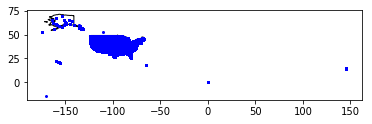

In [9]:
# Interesting.... find a way to make them less ugly 
ax = world[world.name == 'United States of America'].plot(color='white', edgecolor='black')
gdfus.plot(ax = ax, color = 'blue', markersize = 1)
plt.show()

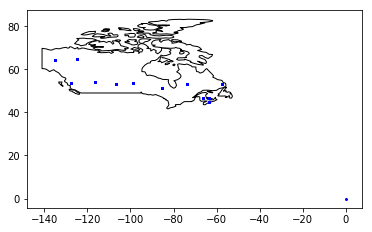

In [10]:
ax = world[world.name == 'Canada'].plot(color='white', edgecolor='black')
gdfca.plot(ax = ax, color = 'blue', markersize = 1)
plt.show()

In [11]:
# Refer to features here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
totalCan = dfCA.groupby(["Province/State", "Date"])["Confirmed"].sum().reset_index(name = "Count")

In [12]:
temp = totalCan.shift(1)
totalCan['Difference'] = totalCan['Count'] - temp['Count']

In [13]:
# Group by provinces; find difference in cases between the next day and day before
# Neg diff: did someone die or recover? Correction in case count?
# 0 diff: no increase or decrease
# totalCan

In [14]:
totalUS = dfUS.groupby(["Province/State", "Date"])["Confirmed"].sum().reset_index(name = "Count")

In [15]:
temp = totalUS.shift(1)
totalUS['Difference'] = totalUS['Count'] - temp['Count']

In [16]:
nyCount = totalUS.loc[(totalUS["Province/State"] == "New York")].reset_index(drop = True)
bcCount = totalCan.loc[(totalCan["Province/State"] == "British Columbia")].reset_index(drop = True)

In [17]:
# TODO: Set each march 22 2020 to NaN
# Hardcoded for now
nyCount.loc[0, "Difference"] = np.NaN
bcCount.loc[0, "Difference"] = np.NaN

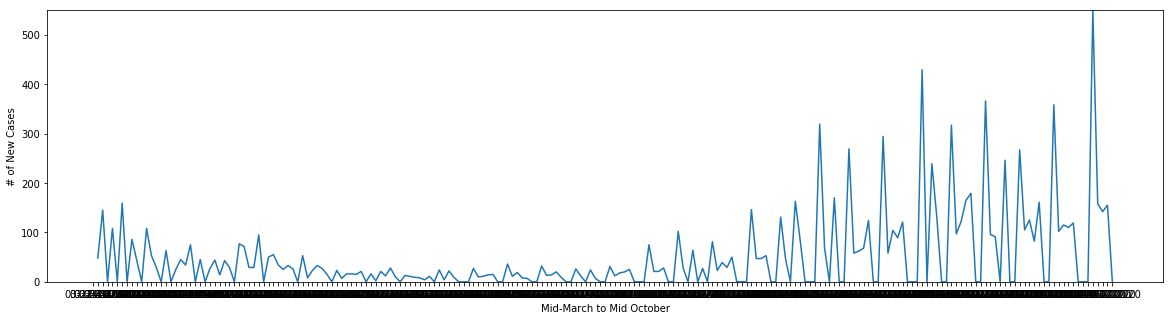

In [18]:
# TODO: Fix graph
plt.figure(figsize = (20,5))
plt.ylim(0,550)
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(bcCount["Date"], bcCount["Difference"])

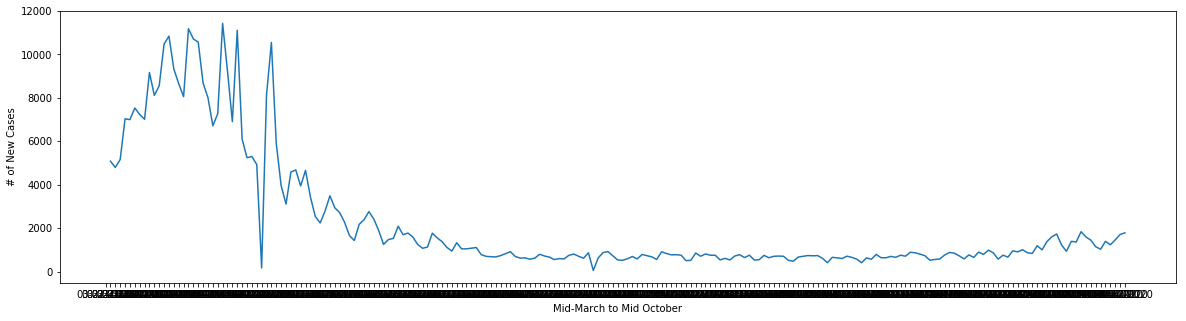

In [19]:
plt.figure(figsize = (20,5))
plt.xlabel("Mid-March to Mid October")
plt.ylabel("# of New Cases")
plt.plot(nyCount["Date"], nyCount["Difference"])

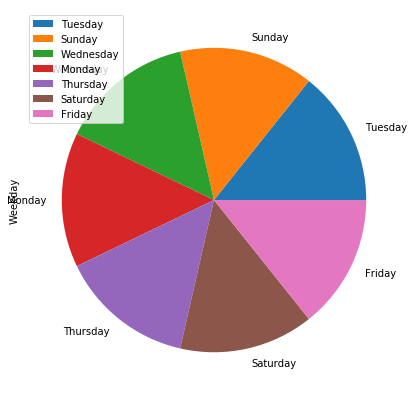

In [21]:
# BC usually does not report case count on weekends. This may result in a spike on Mondays.
# Verify integrity of data.

# Check for # of weekends reported for BC
bcCount['Date'] = pd.to_datetime(bcCount['Date'])
bcCount['Weekday'] = bcCount['Date'].dt.day_name()

bcDayCount = pd.DataFrame(bcCount['Weekday'].value_counts())
dayRecords = bcDayCount.plot.pie(y = 'Weekday', figsize = (7,7))
# Result: It seems like there are published results on weekends.

In [22]:
bcCount.drop(columns = ['Weekday'])
bcCount['Month'] = bcCount['Date'].dt.month_name()
# Produce averages 
bcCount.groupby(['Month']).mean()

,Count,Difference
Month,,
April,1567.333333,36.633333
August,4532.645161,69.322581
July,3204.806452,23.387097
June,2747.866667,11.433333
March,733.100000,65.444444
May,2402.225806,14.870968
October,10161.352941,120.647059
September,7433.766667,111.600000


In [23]:
bcCount

,Province/State,Date,Count,Difference,Weekday,Month
0,British Columbia,2020-03-22,424,NaN,Sunday,March
1,British Columbia,2020-03-23,472,48.0,Monday,March
2,British Columbia,2020-03-24,617,145.0,Tuesday,March
3,British Columbia,2020-03-25,617,0.0,Wednesday,March
4,British Columbia,2020-03-26,725,108.0,Thursday,March
5,British Columbia,2020-03-27,725,0.0,Friday,March
6,British Columbia,2020-03-28,884,159.0,Saturday,March
7,British Columbia,2020-03-29,884,0.0,Sunday,March
8,British Columbia,2020-03-30,970,86.0,Monday,March
9,British Columbia,2020-03-31,1013,43.0,Tuesday,March


In [25]:
%store dfNA
%store dfUS
%store dfCA
%store provs
%store states
%store counties
%store totalCan
%store totalUS
%store nyCount
%store bcCount

%store -r

Stored 'dfNA' (DataFrame)
Stored 'dfUS' (DataFrame)
Stored 'dfCA' (DataFrame)
Stored 'provs' (DataFrame)
Stored 'states' (DataFrame)
Stored 'counties' (DataFrame)
Stored 'totalCan' (DataFrame)
Stored 'totalUS' (DataFrame)
Stored 'nyCount' (DataFrame)
Stored 'bcCount' (DataFrame)


In [85]:
# Make DFs for each corresponding airport 

# LGA 
lgaCounties = lga["county"].to_list()
lgaCases = dfUS[dfUS["Province/State"] == "New York"]
lgaCases = lgaCases[lgaCases["County"].apply(lambda x: x in lgaCounties)].reset_index(drop = True)

In [84]:
# JFK
jfkCounties = jfk["county"].to_list()
jfkCases = dfUS[dfUS["Province/State"] == "New York"]
jfkCases = jfkCases[jfkCases["County"].apply(lambda x: x in jfkCounties)]
jfkCases = jfkCases.reset_index(drop = True)

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,County,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"Nassau, New York, US",1900,US,Nassau,03-22-2020,4,NaN,40.740665,-73.589419,New York,0
1,0.0,NaN,"Suffolk, New York, US",1034,US,Suffolk,03-22-2020,9,NaN,40.883201,-72.801217,New York,0
2,0.0,NaN,"Kings, New York, US",0,US,Kings,03-22-2020,0,NaN,40.636182,-73.949356,New York,0
3,0.0,NaN,"Lewis, New York, US",0,US,Lewis,03-22-2020,0,NaN,43.784416,-75.449040,New York,0
4,0.0,NaN,"Queens, New York, US",0,US,Queens,03-22-2020,0,NaN,40.710881,-73.816847,New York,0
5,0.0,NaN,"Kings, New York, US",0,US,Kings,03-23-2020,0,NaN,40.636183,-73.949356,New York,0
6,0.0,NaN,"Lewis, New York, US",0,US,Lewis,03-23-2020,0,NaN,43.784416,-75.449040,New York,0
7,0.0,NaN,"Nassau, New York, US",2442,US,Nassau,03-23-2020,4,NaN,40.740665,-73.589419,New York,0
8,0.0,NaN,"Queens, New York, US",0,US,Queens,03-23-2020,0,NaN,40.710881,-73.816847,New York,0
9,0.0,NaN,"Suffolk, New York, US",1458,US,Suffolk,03-23-2020,13,NaN,40.883201,-72.801217,New York,0


In [86]:
# SEA
seaCounties = sea["county"].to_list()
seaCases = dfUS[dfUS["Province/State"] == "Washington"]
seaCases = seaCases[seaCases["County"].apply(lambda x: x in seaCounties)].reset_index(drop = True)
seaCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,County,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"Pierce, Washington, US",107,US,Pierce,03-22-2020,1,NaN,47.038928,-122.140596,Washington,0
1,0.0,NaN,"Skagit, Washington, US",33,US,Skagit,03-22-2020,0,NaN,48.481715,-121.766131,Washington,0
2,0.0,NaN,"Spokane, Washington, US",20,US,Spokane,03-22-2020,0,NaN,47.621131,-117.404649,Washington,0
3,0.0,NaN,"Kitsap, Washington, US",18,US,Kitsap,03-22-2020,0,NaN,47.634790,-122.643606,Washington,0
4,0.0,NaN,"Yakima, Washington, US",16,US,Yakima,03-22-2020,0,NaN,46.457385,-120.738013,Washington,0
5,0.0,NaN,"Whatcom, Washington, US",14,US,Whatcom,03-22-2020,2,NaN,48.822280,-121.749002,Washington,0
6,0.0,NaN,"Thurston, Washington, US",11,US,Thurston,03-22-2020,0,NaN,46.929189,-122.829066,Washington,0
7,0.0,NaN,"Clark, Washington, US",10,US,Clark,03-22-2020,3,NaN,45.775680,-122.482920,Washington,0
8,0.0,NaN,"Benton, Washington, US",7,US,Benton,03-22-2020,2,NaN,46.239470,-119.512083,Washington,0
9,0.0,NaN,"Jefferson, Washington, US",6,US,Jefferson,03-22-2020,0,NaN,47.750031,-123.560970,Washington,0


In [87]:
# ATL
atlCounties = atl["county"].to_list()
atlCases = dfUS[dfUS["Province/State"] == "Georgia"]
atlCases = atlCases[atlCases["County"].apply(lambda x: x in atlCounties)].reset_index(drop = True)
atlCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,County,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"Cobb, Georgia, US",67,US,Cobb,03-22-2020,2,NaN,33.942432,-84.576126,Georgia,0
1,0.0,NaN,"DeKalb, Georgia, US",53,US,DeKalb,03-22-2020,0,NaN,33.769440,-84.223960,Georgia,0
2,0.0,NaN,"Dougherty, Georgia, US",52,US,Dougherty,03-22-2020,6,NaN,31.533285,-84.217224,Georgia,0
3,0.0,NaN,"Gwinnett, Georgia, US",27,US,Gwinnett,03-22-2020,1,NaN,33.960442,-84.021378,Georgia,0
4,0.0,NaN,"Lee, Georgia, US",16,US,Lee,03-22-2020,0,NaN,31.779331,-84.143243,Georgia,0
5,0.0,NaN,"Clayton, Georgia, US",13,US,Clayton,03-22-2020,0,NaN,33.541872,-84.355942,Georgia,0
6,0.0,NaN,"Floyd, Georgia, US",9,US,Floyd,03-22-2020,1,NaN,34.262683,-85.215774,Georgia,0
7,0.0,NaN,"Clarke, Georgia, US",9,US,Clarke,03-22-2020,0,NaN,33.954365,-83.371240,Georgia,0
8,0.0,NaN,"Hall, Georgia, US",9,US,Hall,03-22-2020,0,NaN,34.322078,-83.818969,Georgia,0
9,0.0,NaN,"Lowndes, Georgia, US",8,US,Lowndes,03-22-2020,0,NaN,30.835688,-83.270567,Georgia,0


In [88]:
# LAX
laxCounties = lax["county"].to_list()
laxCases = dfUS[dfUS["Province/State"] == "California"]
laxCases = laxCases[laxCases["County"].apply(lambda x: x in laxCounties)].reset_index(drop = True)
laxCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,County,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"Los Angeles, California, US",407,US,Los Angeles,03-22-2020,5,NaN,34.308284,-118.228241,California,0
1,0.0,NaN,"San Diego, California, US",155,US,San Diego,03-22-2020,0,NaN,33.034846,-116.736533,California,0
2,0.0,NaN,"San Mateo, California, US",117,US,San Mateo,03-22-2020,1,NaN,37.422881,-122.327555,California,0
3,0.0,NaN,"San Francisco, California, US",108,US,San Francisco,03-22-2020,0,NaN,37.752151,-122.438567,California,0
4,0.0,NaN,"Orange, California, US",95,US,Orange,03-22-2020,0,NaN,33.701475,-117.764600,California,0
5,0.0,NaN,"Sacramento, California, US",53,US,Sacramento,03-22-2020,3,NaN,38.451068,-121.342537,California,0
6,0.0,NaN,"Marin, California, US",38,US,Marin,03-22-2020,0,NaN,38.071225,-122.721063,California,0
7,0.0,NaN,"Riverside, California, US",29,US,Riverside,03-22-2020,6,NaN,33.743150,-115.993358,California,0
8,0.0,NaN,"San Luis Obispo, California, US",27,US,San Luis Obispo,03-22-2020,0,NaN,35.388220,-120.403903,California,0
9,0.0,NaN,"Ventura, California, US",25,US,Ventura,03-22-2020,0,NaN,34.444657,-119.091061,California,0


In [94]:
# YVR
yvrCases = dfCA[dfCA["Province/State"] == "British Columbia"]
yvrCases = yvrCases.reset_index(drop = True)
yvrCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"British Columbia, Canada",424,Canada,03-22-2020,10,NaN,53.7267,-127.6476,British Columbia,0
1,0.0,NaN,"British Columbia, Canada",472,Canada,03-23-2020,13,NaN,53.7267,-127.6476,British Columbia,0
2,0.0,NaN,"British Columbia, Canada",617,Canada,03-24-2020,13,NaN,53.7267,-127.6476,British Columbia,0
3,0.0,NaN,"British Columbia, Canada",617,Canada,03-25-2020,13,NaN,53.7267,-127.6476,British Columbia,0
4,0.0,NaN,"British Columbia, Canada",725,Canada,03-26-2020,14,NaN,53.7267,-127.6476,British Columbia,0
5,0.0,NaN,"British Columbia, Canada",725,Canada,03-27-2020,14,NaN,53.7267,-127.6476,British Columbia,0
6,0.0,NaN,"British Columbia, Canada",884,Canada,03-28-2020,17,NaN,53.7267,-127.6476,British Columbia,0
7,0.0,NaN,"British Columbia, Canada",884,Canada,03-29-2020,17,NaN,53.7267,-127.6476,British Columbia,0
8,0.0,NaN,"British Columbia, Canada",970,Canada,03-30-2020,19,NaN,53.7267,-127.6476,British Columbia,0
9,0.0,NaN,"British Columbia, Canada",1013,Canada,03-31-2020,24,NaN,53.7267,-127.6476,British Columbia,0


In [97]:
# YYZ
yyzCases = dfCA[dfCA["Province/State"] == "Ontario"]
yyzCases = yyzCases.reset_index(drop = True)
yyzCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"Ontario, Canada",425,Canada,03-22-2020,5,NaN,51.2538,-85.3232,Ontario,0
1,0.0,NaN,"Ontario, Canada",503,Canada,03-23-2020,6,NaN,51.2538,-85.3232,Ontario,0
2,0.0,NaN,"Ontario, Canada",588,Canada,03-24-2020,7,NaN,51.2538,-85.3232,Ontario,0
3,0.0,NaN,"Ontario, Canada",688,Canada,03-25-2020,8,NaN,51.2538,-85.3232,Ontario,0
4,0.0,NaN,"Ontario, Canada",858,Canada,03-26-2020,13,NaN,51.2538,-85.3232,Ontario,0
5,0.0,NaN,"Ontario, Canada",994,Canada,03-27-2020,18,NaN,51.2538,-85.3232,Ontario,0
6,0.0,NaN,"Ontario, Canada",1144,Canada,03-28-2020,18,NaN,51.2538,-85.3232,Ontario,0
7,0.0,NaN,"Ontario, Canada",1355,Canada,03-29-2020,21,NaN,51.2538,-85.3232,Ontario,0
8,0.0,NaN,"Ontario, Canada",1706,Canada,03-30-2020,31,NaN,51.2538,-85.3232,Ontario,0
9,0.0,NaN,"Ontario, Canada",1966,Canada,03-31-2020,33,NaN,51.2538,-85.3232,Ontario,0


In [98]:
# YEG
yegCases = dfCA[dfCA["Province/State"] == "Alberta"]
yegCases = yegCases.reset_index(drop = True)
yegCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"Alberta, Canada",259,Canada,03-22-2020,1,NaN,53.9333,-116.5765,Alberta,0
1,0.0,NaN,"Alberta, Canada",301,Canada,03-23-2020,1,NaN,53.9333,-116.5765,Alberta,0
2,0.0,NaN,"Alberta, Canada",359,Canada,03-24-2020,1,NaN,53.9333,-116.5765,Alberta,0
3,0.0,NaN,"Alberta, Canada",358,Canada,03-25-2020,2,NaN,53.9333,-116.5765,Alberta,0
4,0.0,NaN,"Alberta, Canada",486,Canada,03-26-2020,2,NaN,53.9333,-116.5765,Alberta,0
5,0.0,NaN,"Alberta, Canada",542,Canada,03-27-2020,2,NaN,53.9333,-116.5765,Alberta,0
6,0.0,NaN,"Alberta, Canada",542,Canada,03-28-2020,2,NaN,53.9333,-116.5765,Alberta,0
7,0.0,NaN,"Alberta, Canada",621,Canada,03-29-2020,2,NaN,53.9333,-116.5765,Alberta,0
8,0.0,NaN,"Alberta, Canada",661,Canada,03-30-2020,3,NaN,53.9333,-116.5765,Alberta,0
9,0.0,NaN,"Alberta, Canada",690,Canada,03-31-2020,8,NaN,53.9333,-116.5765,Alberta,0


In [99]:
# YUL
yulCases = dfCA[dfCA["Province/State"] == "Quebec"]
yulCases = yulCases.reset_index(drop = True)
yulCases

,Active,Case-Fatality_Ratio,Combined_Key,Confirmed,Country/Region,Date,Deaths,Incidence_Rate,Latitude,Longitude,Province/State,Recovered
0,0.0,NaN,"Quebec, Canada",219,Canada,03-22-2020,4,NaN,52.9399,-73.5491,Quebec,0
1,0.0,NaN,"Quebec, Canada",628,Canada,03-23-2020,4,NaN,52.9399,-73.5491,Quebec,0
2,0.0,NaN,"Quebec, Canada",1013,Canada,03-24-2020,4,NaN,52.9399,-73.5491,Quebec,0
3,0.0,NaN,"Quebec, Canada",1342,Canada,03-25-2020,6,NaN,52.9399,-73.5491,Quebec,0
4,0.0,NaN,"Quebec, Canada",1632,Canada,03-26-2020,8,NaN,52.9399,-73.5491,Quebec,0
5,0.0,NaN,"Quebec, Canada",2024,Canada,03-27-2020,18,NaN,52.9399,-73.5491,Quebec,0
6,0.0,NaN,"Quebec, Canada",2498,Canada,03-28-2020,22,NaN,52.9399,-73.5491,Quebec,0
7,0.0,NaN,"Quebec, Canada",2840,Canada,03-29-2020,22,NaN,52.9399,-73.5491,Quebec,0
8,0.0,NaN,"Quebec, Canada",3430,Canada,03-30-2020,22,NaN,52.9399,-73.5491,Quebec,0
9,0.0,NaN,"Quebec, Canada",4162,Canada,03-31-2020,31,NaN,52.9399,-73.5491,Quebec,0


In [100]:
lga.to_csv('lgaCases.csv')
jfk.to_csv('jfkCases.csv')
sea.to_csv('seaCases.csv')
atl.to_csv('atlCases.csv')
lax.to_csv('laxCases.csv')
yvr.to_csv('yvrCases.csv')
yeg.to_csv('yegCases.csv')
yyz.to_csv('yyzCases.csv')
yul.to_csv('yulCases.csv')

NameError: name 'yeg' is not defined